In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk

In [40]:
df = pd.read_csv('mbti.csv')

In [41]:
# converting all to lower case 
df['posts'] = [i.lower() for i in df['posts']]

In [42]:
df['posts'].head()

0    'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1    'i'm finding the lack of me in these posts ver...
2    'good one  _____   https://www.youtube.com/wat...
3    'dear intp,   i enjoyed our conversation the o...
4    'you're fired.|||that's another silly misconce...
Name: posts, dtype: object

In [43]:
no_groups = df.groupby('type').count()

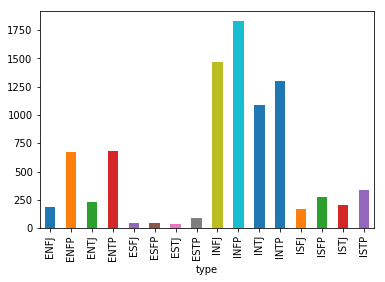

In [44]:
no_groups['posts'].plot(kind= 'bar')

In [45]:
df['Distinct Posts'] = [i.split('|||') for i in df['posts']]

In [46]:
df['Number of posts'] = df['Distinct Posts'].apply(len)
df.drop('Distinct Posts',inplace=True,axis=1)

In [47]:
df = df[df['Number of posts']==50]

In [48]:
#removing urls
df['Posts']= df['posts'].apply(lambda x: re.sub(r'https?:[?:A-Za-z0-9//_?.=/-]+', '', x.replace('|','')))
#keeping the end of strings
#removing punctuation marks
df['Posts']=df['Posts'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
#removing numbers and alphanumeric characters
df['Posts']=df['Posts'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))
# removing special symbols
df['Posts']=df['Posts'].apply(lambda x: re.sub(r'[0-9,."\'*.?/\()@#!$%&^+]', '', x))
# removing repetitive multiple letter words and too long or too short words
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))
#df['Posts'] = df['Posts'].apply(lambda x: re.sub(r'\s[\s+]','',x))
df.drop('posts',inplace=True,axis=1)
df.to_csv('mbti_cleaned.csv')

In [10]:
data = pd.read_csv('mbti_cleaned.csv')
x = data['type']
data.drop(['Unnamed: 0', 'type'], axis = 1,inplace = True)
data['type'] = x
data

,Number of posts,Posts,type
0,50,intj moments sportscenter plays pra...,INFJ
1,50,finding lack these posts very alarmingsex...,ENTP
2,50,good course which know thats blessi...,INTP
3,50,dear intp enjoyed conversation other es...,INTJ
4,50,youre firedthats another silly misconception t...,ENTJ
5,50,science perfect scientist claims that ...,INTJ
6,50,cant draw nails haha those were done pro...,INFJ
7,50,tend build collection things desktop th...,INTJ
8,50,sure thats good question distinction betwe...,INFJ
9,50,this position where have actually pers...,INTP


In [11]:
data.dropna(inplace= True)

In [12]:
# Creating a dataframe wherein each person and his personality type is a row and all the posts by him are the columns 
l2 = list(set(data['type']))
d = {}
count = 0
for ptype in l2:
    d[ptype] = ''
for pertype in data['type']:
    d[pertype] = d[pertype]+" "+ data.iloc[count,1]
    count+=1
   

In [13]:
new_data = pd.DataFrame()
for i in d.keys():
    new_data.loc[i,'Posts']= d[i]
new_data

,Posts
ISFP,they paint without numbersid guess istp toom...
ESTP,splinter cell blacklist xbox generally wel...
ISTP,from what read about enneagram thoug...
ESTJ,this such catch here although quite ter...
ESFJ,notany other esfjs originally mistype th...
ENTP,finding lack these posts very alarmingse...
INFP,think agree personally dont consider myse...
ENFP,doesnt want trip without staying behi...
INTP,good course which know thats bless...
ISTJ,newtons universal gravity mean seriously wh...


In [15]:
new_data['Cat_id'] = range(1,17)
new_data

16

In [5]:
#TF-IDF MODEL
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [20]:
tfidf  = TfidfVectorizer(sublinear_tf=True,min_df=5, ngram_range=(1, 2), stop_words='english')

In [21]:
X = tfidf.fit_transform(new_data['Posts']).toarray()

In [19]:
#print(X.toarray())

[[0.         0.00160978 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00061957 ... 0.         0.00061957 0.00061957]
 [0.00072711 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


0.5600370885489105
